In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
dir_name = "../ics_cwe/"
models = ["pretrained_SecBert", "SecBert_E5", "pretrained_SecureBert",  "SecureBert_E5", "pretrained_Gpt2","Gpt2_E5"]
text_embeddings = []
our_embeddings = []
for model in models:
    text_embeddings.append(np.load(dir_name+model+"/data/all_embeddings.npy"))
    our_embeddings.append(np.load(dir_name+model+"/data/our_embeddings.npy"))

In [21]:
text_sil = []
our_sil = []
k_values = [2,3,4,5,6]
for i,model in enumerate(models):
# Calculate silhouette scores for both sets of vectors
    text_sil.append(calculate_silhouette_scores(text_embeddings[i], k_values))
    our_sil.append(calculate_silhouette_scores(our_embeddings[i], k_values))

/home/afarhan/anaconda3/envs/gpt/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/afarhan/anaconda3/envs/gpt/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/afarhan/anaconda3/envs/gpt/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/afarhan/anaconda3/envs/gpt/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

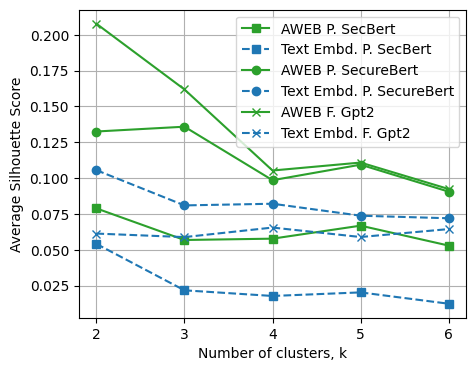

In [41]:
import matplotlib.colors as mcolors
# Define the range of k values
k_values = [2,3,4,5,6]

# Function to calculate silhouette scores for a dataset
def calculate_silhouette_scores(X, k_values):
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        # print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")
    return silhouette_scores

base_color = 'blue'
colors_X1 = ['tab:blue','tab:purple', 'tab:red', 'tab:orange','tab:green','tab:olive']
colors_X2 = ['tab:blue','tab:purple', 'tab:red','tab:orange','tab:green','tab:olive']
base_color2 = 'green'

models = ["P. SecBert", "F. SecBert", "P. SecureBert",  "F. SecureBert", "P. Gpt2" ,  "F. Gpt2"]
model_pos = [0,2,5]
markers = ['s', '>', 'o', '^', '.', 'x']
# Plot the results
plt.figure(figsize=(5,4))
for i in model_pos:
    model =models[i]
# Calculate silhouette scores for both sets of vectors
    silhouette_scores_X1 = text_sil[i]
    silhouette_scores_X2 = our_sil[i]
    plt.plot(k_values, silhouette_scores_X2, marker=markers[i], linestyle='-',color='tab:green', label='AWEB '+str(model))
    plt.plot(k_values, silhouette_scores_X1, marker=markers[i], linestyle='--',color='tab:blue', label='Text Embd. '+str(model))

#plt.title('Average Silhouette Scores for different values of k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.savefig(dir_name+"plots/avg_silhouette_scores.pdf", dpi=300, bbox_inches='tight')
plt.show()